# Coursera Capstone Project
### IBM Applied Data Science Capstone
### Analysing to open a Indian Restaurant in New York City




##### Vasanthan Veerasingham
##### Data Scientist

*****

# 1. Introduction
### 1. 1 Background

New York is the most populous city in USA, with a population of 8 million. Foreign-born people account for nearly half of the population of New York. New York is recognized as one of the most multicultural and cosmopolitan cities in the world. New York has no dominant culture or nationality, which also makes it one of the world's most diverse cities. New York is an international Centre of business, finance, art and culture. New York offers a very wide commercial variety, especially in the area of gastronomy. The trend that comes to stay, are Asian restaurants, particularly Indian restaurants. This data science report explores the best locations for Indian restaurants throughout the city of New York. Potentially the owner of the new Indian restaurant can have great success and consistent profit.

### 1. 1 Problem

In this data science report we have to find the solution for a real business problem. When a business man want to open a Indian restaurant in New York, we use our data science knowledge to find the facts on two basic questions to open an restaurant in New York How well New York people like Indian foods, Which neighborhood place is best to open a Indian restaurant in New York? And Which Indian restaurant their favorite now?

### 1. 1 Interest

This data science report is particularly useful to developers and investors looking to open or invest in a Indian restaurant in the city of New York. Broadly, New York is a great place to open a restaurant with an ethnical cuisine. New York is home to many ethnic neighborhoods such as Little India, Little Italy, Chinatown and Little Jamaica and comes with diversity in the food items too.
Now when the idea of a healthy lifestyle conquered the minds of people all over the country, Indian restaurants became extremely popular, as they offer a healthy alternative to regular American eating habits. In consequence, as a reader of this data science report, common people of New York can find where they have Indian restaurants to eat healthy foods for better life.

***

### Python coding Final Project in Coursera Applied Data Science Capstone course offered by IBM 

#### Import necessary libraries for the part of the project

In [1]:
#Import necessary libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Required Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

### Define Foursquare Credentials and Version

In [2]:
# Define Foursquare Credentials and Version


CLIENT_ID = 'BC02ZFLGQHUGGN0U4WEGGRODRU0WQTSNZPKOCR0TB3ELVAAT' # your Foursquare ID
CLIENT_SECRET = 'MOJ3DJ52AXY3WWSWCSAEJWXFAVB3XI0CUHGIQ0XOVPWS14QB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

##### Define the functions we use later in this project

In [3]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

##### Use the above function to get our initial New York City data

In [5]:
new_york_data = get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Initial Dataset get from sources

##### Dimension of Data 

In [6]:
new_york_data.shape

(306, 4)

There are total of 306 different Neighborhoods in New York.

### Use the bar chart to visualizing the neighborhoods per Borough in the New York City

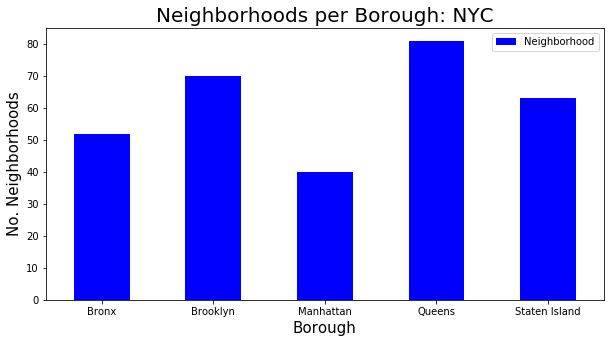

In [9]:
clr = "blue"
new_york_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

### Now we find out how many Indian restaurants are in each neighborhood and borough. 

In [10]:
# queens has most neighborhoods
# prepare neighborhood list that contains Indian restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_restaurants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(new_york_data),')','Indian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(indian_restaurants)))
    print(row)
    for resturant_detail in indian_restaurants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Indian Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Indian Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Indian Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Indian Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Indian Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Indian Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Indian Restaurants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Indian Restaurants in Norwood, Bronx:0
['Bronx', '

In [11]:
# Transfer the result data into the .csv file for future use
indian_rest_ny.to_csv('indian_rest_ny_tocsv1.csv')

In [14]:
indian_ny = pd.read_csv('indian_rest_ny_tocsv1.csv')
indian_ny.head()

,Unnamed: 0,Borough,Neighborhood,ID,Name
0,0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,1,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,2,Brooklyn,Bay Ridge,545835a1498e820edc6f636f,Bombay Grill
3,3,Brooklyn,Greenpoint,51a5445c498ee0f182370cb2,Agra Taj Mahal
4,4,Brooklyn,Bushwick,5169f5c4e4b0c7fcb77a0f3c,Agra Heights


In [15]:
indian_ny.shape

(42, 5)

### There are 42 Indian Restaurants in the New York City

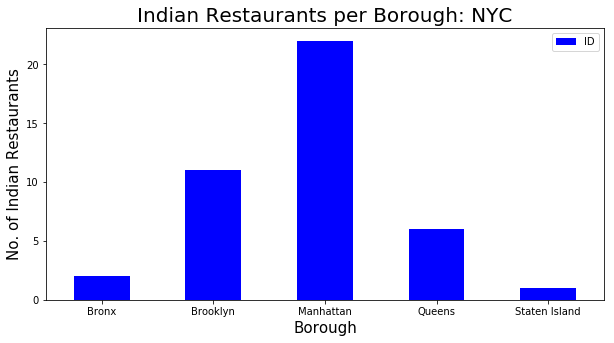

In [16]:
indian_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Indian Restaurants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Indian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

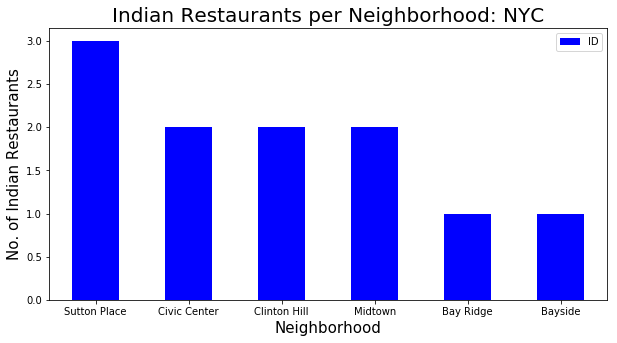

In [18]:
NOofNeigh = 6 # top number for graphing all the same past 6
indian_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Indian Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Indian Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [19]:
indian_ny[indian_ny['Neighborhood']=='Sutton Place']

,Unnamed: 0,Borough,Neighborhood,ID,Name
37,37,Manhattan,Sutton Place,4a63bfb4f964a520b3c51fe3,Chola Eclectic Indian Cuisine
38,38,Manhattan,Sutton Place,3fd66200f964a52099e91ee3,Dawat
39,39,Manhattan,Sutton Place,4fe4fb50c2eee335e4fea69d,Moti Mahal Delux


### Sutton Place neighborhood in Manhattan Borough have the highest no of Indian Restaurants = 3

### Now we step up the our analysis to next level to find the our Project requirements. Get the ranking of each restaurant for further analysis

In [20]:
#Get the ranking of each restaurant for further analysis
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
indian_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5e88fbf43907e7001ba5f558'}, 'response': {'venue': {'id': '4c0448d9310fc9b6bf1dc761', 'name': 'Curry Spot', 'contact': {'phone': '7187085900', 'formattedPhone': '(718) 708-5900'}, 'location': {'address': '4268 Katonah Ave', 'crossStreet': 'E 235 Street', 'lat': 40.897624941880906, 'lng': -73.86714729157393, 'labeledLatLngs': [{'label': 'display', 'lat': 40.897624941880906, 'lng': -73.86714729157393}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4268 Katonah Ave (E 235 Street)', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/curry-spot/4c0448d9310fc9b6bf1dc761', 'categories': [{'id': '4bf58dd8d48988d10f941735', 'name': 'Indian Restaurant', 'pluralName': 'Indian Restaurants', 'shortName': 'Indian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount':

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
37,Manhattan,Sutton Place,4a63bfb4f964a520b3c51fe3,Chola Eclectic Indian Cuisine,155,8.4,58
38,Manhattan,Sutton Place,3fd66200f964a52099e91ee3,Dawat,35,7.8,39
39,Manhattan,Sutton Place,4fe4fb50c2eee335e4fea69d,Moti Mahal Delux,186,8.4,83
40,Manhattan,Flatiron,52a1fa08498ede15b1530912,Deep Indian Kitchen (Indikitch),682,8.4,133
41,Queens,Sunnyside Gardens,4c48da9f3013a59356c5f0e1,Saffron Garden,17,7.6,16


In [21]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny_csv.csv') #Tranfer the result in to the .csv file

### Now we have big dataset that have the information about the Indian restaurants in New York City. Let we check the size of the dataset. 

In [22]:
indian_rest_stats_ny.shape

(42, 7)

Now we check what values we have in our DataFrame

In [23]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
Borough         42 non-null object
Neighborhood    42 non-null object
ID              42 non-null object
Name            42 non-null object
Likes           42 non-null object
Rating          42 non-null float64
Tips            42 non-null object
dtypes: float64(1), object(6)
memory usage: 2.4+ KB


From the info we find values Likes and Tips are string values. We would need to convert them into float for further analysis for our project requirements

In [25]:
indian_rest_stats_ny['Likes'] = indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips'] = indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
Borough         42 non-null object
Neighborhood    42 non-null object
ID              42 non-null object
Name            42 non-null object
Likes           42 non-null float64
Rating          42 non-null float64
Tips            42 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.4+ KB


In [26]:
indian_rest_stats_ny.describe()

,Likes,Rating,Tips
count,42.000000,42.000000,42.000000
mean,95.404762,7.785714,30.785714
std,178.039193,0.819748,47.582809
min,3.000000,5.700000,1.000000
25%,17.250000,7.525000,8.250000
50%,34.500000,7.850000,16.500000
75%,81.000000,8.400000,28.500000
max,834.000000,9.100000,259.000000


Now we can find which restaurant have maximum likes

In [27]:
# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                834
Rating                               8.7
Tips                                 259
Name: 18, dtype: object

In [28]:
# Resturant with maximum Ratings
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               9.1
Tips                                 148
Name: 23, dtype: object

In [29]:
# Resturant with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                834
Rating                               8.7
Tips                                 259
Name: 18, dtype: object

Now we find and visualize neighborhood with the maximum average rating of restaurants

In [30]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
30,Tribeca,9.10
24,Noho,8.80
6,Chelsea,8.70
12,Fort Greene,8.70
26,Prospect Lefferts Gardens,8.60
22,Midtown,8.55
25,North Side,8.50
34,West Village,8.50
15,Greenwich Village,8.40
11,Flatiron,8.40


Above are the top neighborhoods with the highest average ratings of Indian restaurants.

In [31]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.140909
4,Staten Island,8.100000
1,Brooklyn,7.400000
3,Queens,7.350000
0,Bronx,7.150000


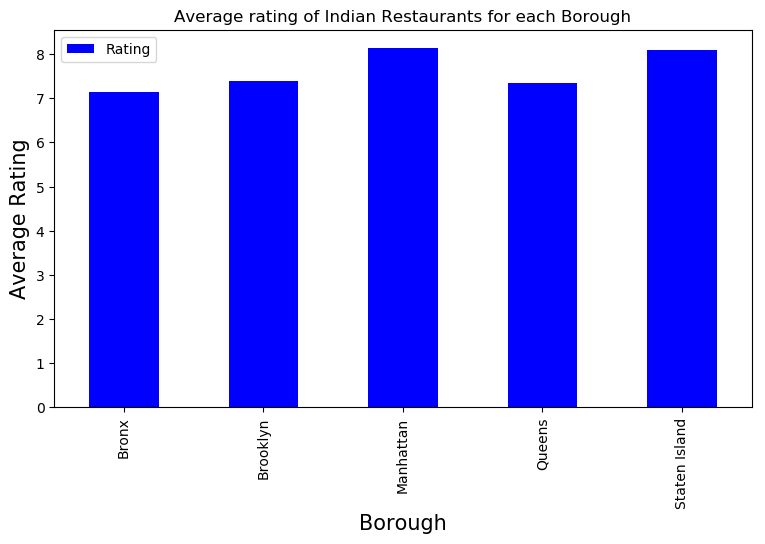

In [32]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Indian Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

In [ ]:
Now We get all the neighborhoods with average rating greater or equal 8.0 to visualize on a map

In [33]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
1,Bayside,8.20
6,Chelsea,8.70
9,East Village,8.40
11,Flatiron,8.40
12,Fort Greene,8.70
15,Greenwich Village,8.40
22,Midtown,8.55
23,New Dorp,8.10
24,Noho,8.80
25,North Side,8.50


Now we join this Dataset to original New York data to get longitude and latitude

In [35]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Bayside,40.766041,-73.774274,8.20
1,Manhattan,Chelsea,40.744035,-74.003116,8.70
2,Staten Island,Chelsea,40.594726,-74.189560,8.70
3,Manhattan,East Village,40.727847,-73.982226,8.40
4,Manhattan,Flatiron,40.739673,-73.990947,8.40
5,Brooklyn,Fort Greene,40.688527,-73.972906,8.70
6,Manhattan,Greenwich Village,40.726933,-73.999914,8.40
7,Manhattan,Midtown,40.754691,-73.981669,8.55
8,Staten Island,New Dorp,40.572572,-74.116479,8.10
9,Manhattan,Noho,40.723259,-73.988434,8.80


### Now we will show this data on a map

In [36]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Add a new field to dataframe for labeling purpose

In [37]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

# Results / Conclusion

Manhattan and Staten Island have the best rated Indian restaurants on average. Staten Island and The Bronx have the least amount of Indian restaurants per borough. However, of note, Sutton Place in Manhattan has the highest number of Indian Restaurants in all of New York City. Despite Manhattan having the least number of neighborhoods in all five boroughs, it has the most number of Indian restaurants. Based on the above information, I would state that Manhattan and Staten Island are the best locations for Indian cuisine in New York City. To have the best shot of success, I would open a Indian restaurant in Staten Island. Staten Island has multiple neighborhoods with average ratings exceeding 8.0 on a scale of 1.0 to 10.0 and has less amount of Indian restaurants than Manhattan, making competition easier. Also we should keep in mind, that real estate prices in Staten Island are much cheaper than in Manhattan. Finally, I would suggest if you like to have good Indian cuisine please go to Midtown in Manhattan for the best Indian food based on 834 likes best average rating 8.7 and highest tips 259. As a final note, all of the above analysis is depended on the accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases.